# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

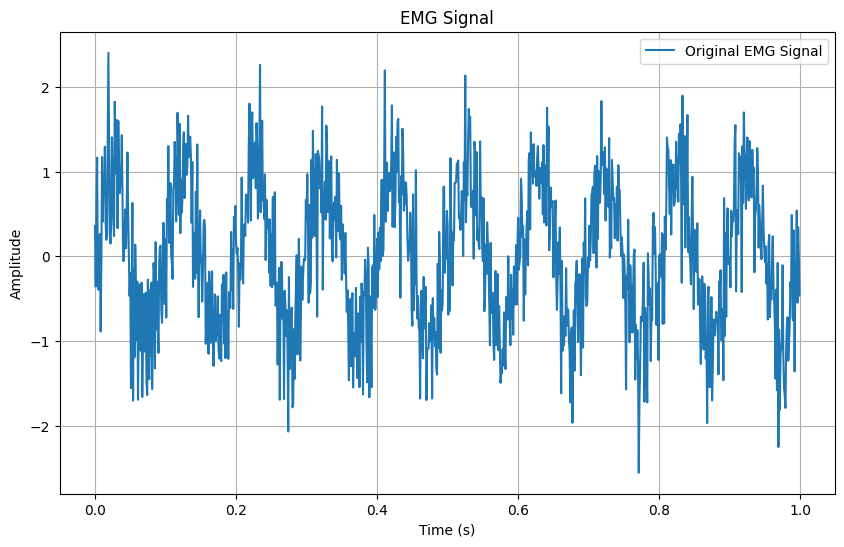

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.signal import butter, filtfilt, find_peaks, hilbert

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
#Implement Butterworth filter or any other best suited filter.
nyq = (fs)/2
cutoff_freq = np.array([5,75])
b,a  = butter(2,cutoff_freq/nyq, btype='bandpass')
filtered_emg_signal = filtfilt(b,a,emg_signal)
afiltered_emg_signal = np.abs(filtered_emg_signal)


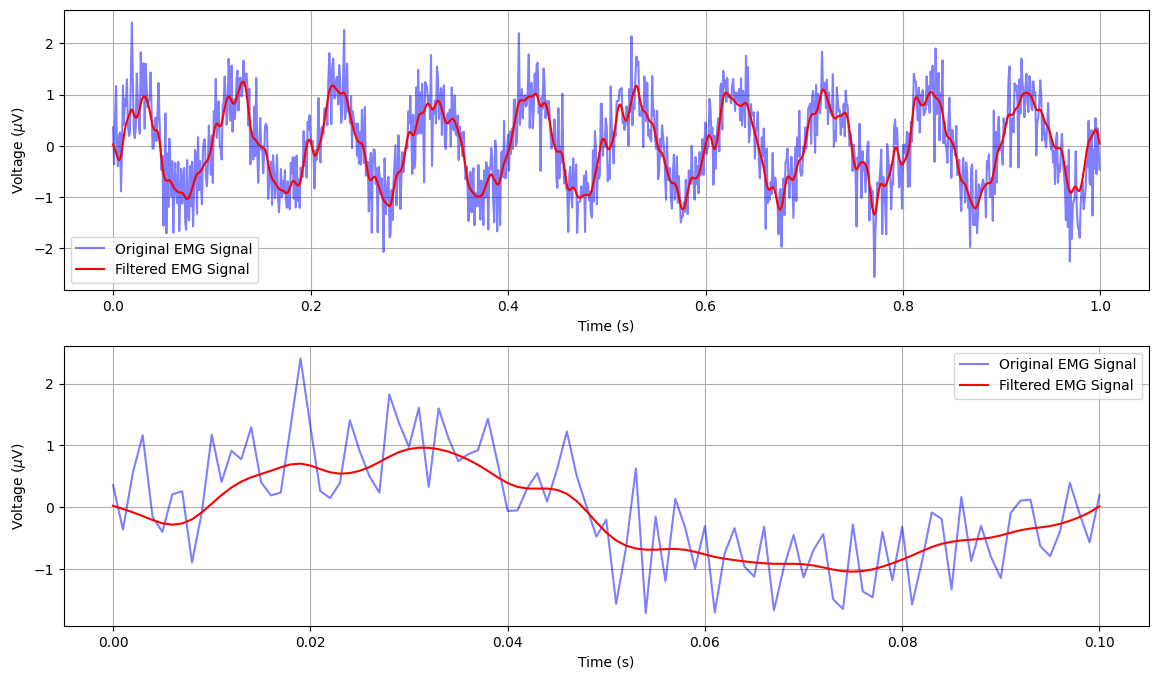

In [109]:
#Compare the frequency response of the original and filtered signals using a frequency plot.
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(t, emg_signal, label='Original EMG Signal', color='blue', alpha=0.5)
plt.plot(t, filtered_emg_signal, label='Filtered EMG Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel(r'Voltage ($\mu$V)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t[0:101], emg_signal[0:101], label='Original EMG Signal', color='blue', alpha=0.5)
plt.plot(t[0:101], filtered_emg_signal[0:101], label='Filtered EMG Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel(r'Voltage ($\mu$V)')
plt.legend()
plt.grid(True)

plt.show()

## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

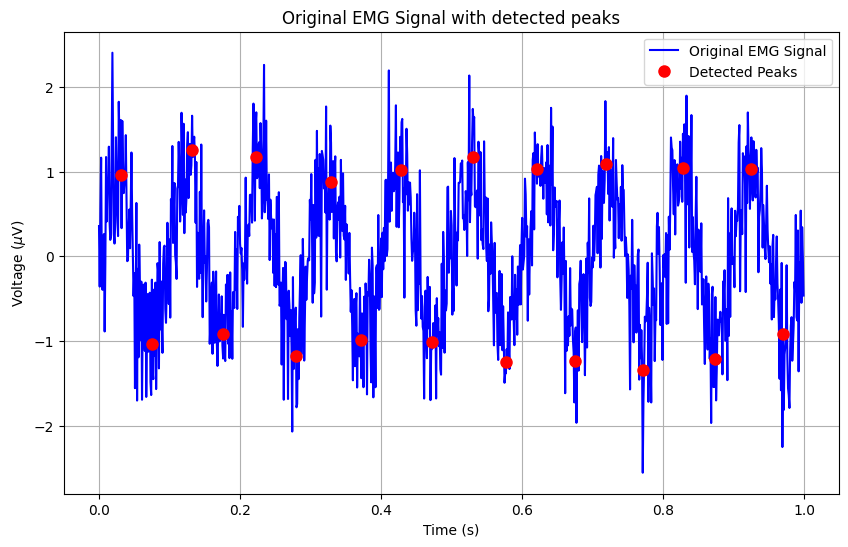

In [110]:
peaks, _ = find_peaks(afiltered_emg_signal, distance=40)
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal', color='blue')
plt.plot(t[peaks], filtered_emg_signal[peaks], 'ro', markersize=8, label='Detected Peaks') 
plt.xlabel('Time (s)')
plt.ylabel(r'Voltage ($\mu$V)')
plt.title('Original EMG Signal with detected peaks')
plt.legend()
plt.grid(True)
plt.show()


Answer the Question here:

In [26]:
# We can adjust the 'distance' parameter to improve peak detection. It should be kept  small enough not to leave out any peak undetected, but also large enough not to detect very close peaks.

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

In [111]:
height = np.mean(afiltered_emg_signal[peaks])
threshold = 0.4*height

starts = []
ends = []

for peak in peaks:
    for i in range(peak,0,-1):
        if afiltered_emg_signal[i]<threshold:
            starts.append(i/fs)
            break
    for i in range(peak,1000):
        if afiltered_emg_signal[i]<threshold:
            ends.append(i/fs)
            break    

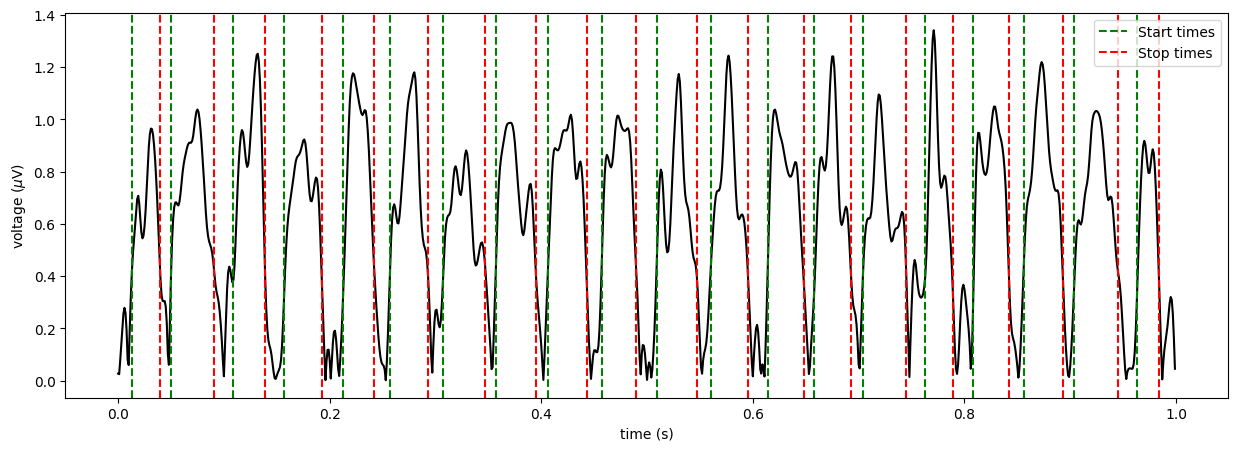

In [112]:
plt.figure(figsize=(15,5))
plt.xlabel('time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(t, afiltered_emg_signal,'k')
for start,end in zip(starts,ends):
    plt.axvline(x=start, linestyle='--',color='green',label='Start times' if start == starts[0] else "")
    plt.axvline(x=end, linestyle='--', color='red', label='Stop times'if end == ends[0] else "")
plt.legend()


Answer the Question here:

In [27]:
# It is important to find the precise onset and offset times because we want minimum latency in the shooting game.

## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

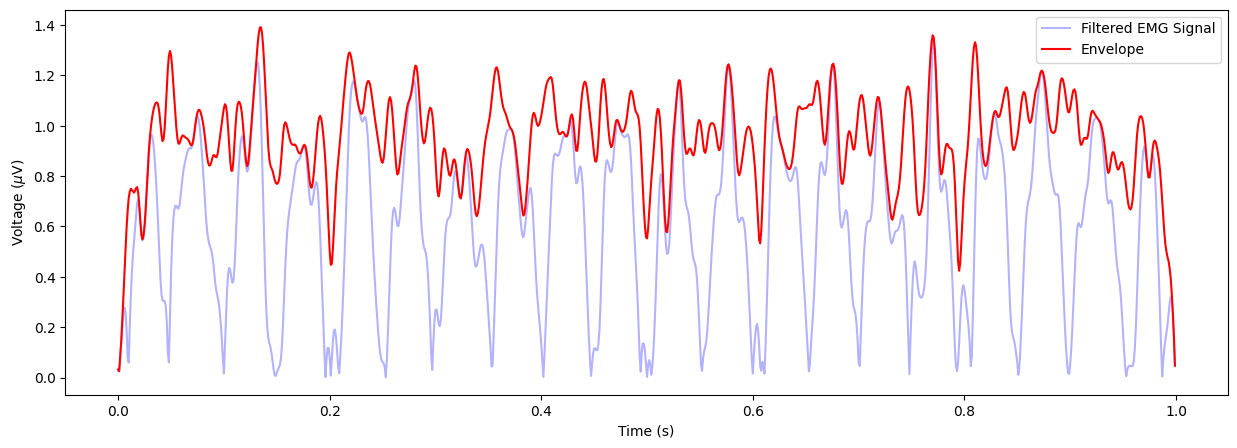

In [117]:
analytical_signal = hilbert(filtered_emg_signal)
envelope = np.abs(analytical_signal)

plt.figure(figsize=(15, 5))
plt.plot(t, afiltered_emg_signal, label='Filtered EMG Signal', color='blue',alpha=0.3)
plt.plot(t,envelope,label='Envelope', color='red')
plt.xlabel('Time (s)')
plt.ylabel(r'Voltage ($\mu$V)')
plt.legend()



Answer the Question here:

In [28]:
#Envelope provides the variation of intensity of muscle signals. This can provide us info about how strong the muscle movement is, and long it lasts, and about fatigue of muscle.

## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [103]:
# Calculate key metrics.

mean = np.mean(afiltered_emg_signal)
variance = np.var(afiltered_emg_signal)
rms = np.sqrt(np.mean(np.power(filtered_emg_signal,2)))

print(mean)
print(variance)
print(rms)

0.6248447292417412
0.130512975989784
0.7217644433268855


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

In [75]:
data_hat = np.fft.fft(filtered_emg_signal,1000)
psd = pow(np.abs(data_hat),2)/1000

freq = (1/1)*np.arange(1000)
L = np.arange(1,500,dtype='int')

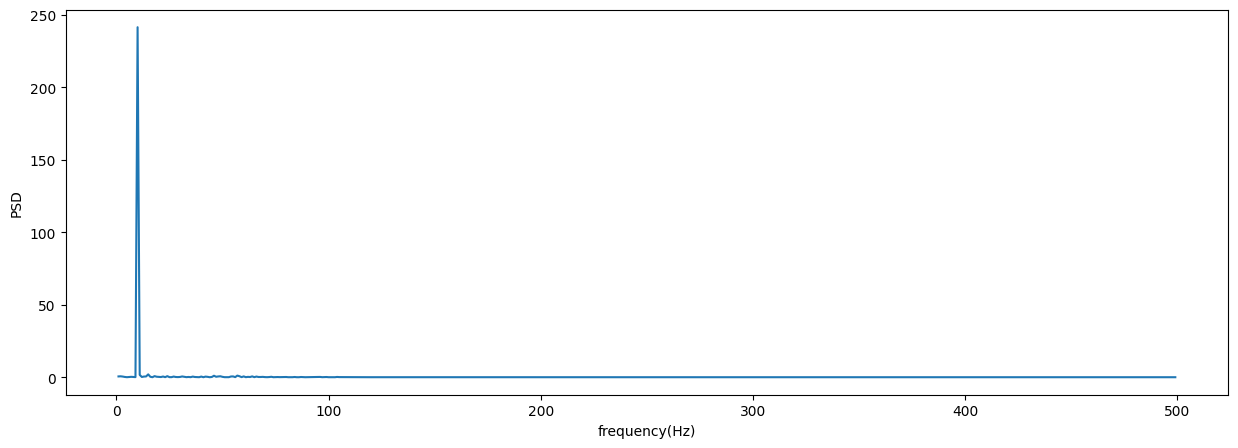

In [76]:
plt.figure(figsize=(15,5))
plt.xlabel('frequency(Hz)')
plt.ylabel('PSD')
plt.plot(freq[L],psd[L])
plt.show()

In [80]:
peak,_ = find_peaks(psd,threshold=50)
print(peak[0])

10


Hence, the prominent frequency is 10 Hz.